name: BHARATHGANESH S

REG NO 212222230022

In [16]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import keras as kf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

(60000,)

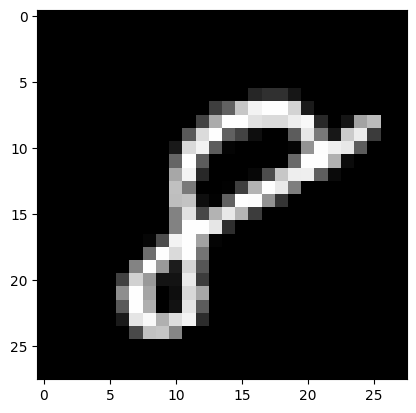

In [17]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape
X_test.shape
single_image= X_train[59999]
single_image.shape
plt.imshow(single_image,cmap='gray')
y_train.shape


In [18]:
X_train.max()

255

In [19]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [20]:
X_train_scaled.min()


0.0

In [21]:
X_train_scaled.max()

1.0

In [22]:
y_train[0]

5

In [23]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)


In [24]:
type(y_train_onehot)

numpy.ndarray

In [25]:
y_train_onehot.shape

(60000, 10)

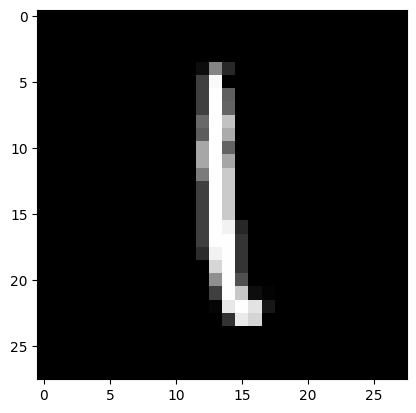

In [26]:
single_image = X_train[5020]
plt.imshow(single_image,cmap='gray')


In [27]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [28]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [29]:
model = keras.Sequential()
model.add (layers. Input (shape=(28,28,1)))
model.add (layers. Conv2D (filters=32, kernel_size=(9,9), activation='relu'))
model.add (layers. MaxPool2D (pool_size=(2,2)))
model.add (layers. Flatten())
model.add (layers. Dense (32, activation='relu'))
model.add (layers. Dense (16, activation='relu'))
model.add (layers. Dense (8, activation='relu'))
model.add (layers. Dense (10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 20, 32)        2624      
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 32)                102432    
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                        

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
model.fit(X_train_scaled,y_train_onehot,epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled, y_test_onehot))

Epoch 1/5
938/938 [==============================] - 37s 38ms/step - loss: 0.4183 - accuracy: 0.8719 - val_loss: 0.1237 - val_accuracy: 0.9645
Epoch 2/5
938/938 [==============================] - 35s 37ms/step - loss: 0.1004 - accuracy: 0.9708 - val_loss: 0.0686 - val_accuracy: 0.9783
Epoch 3/5
938/938 [==============================] - 37s 39ms/step - loss: 0.0655 - accuracy: 0.9805 - val_loss: 0.0582 - val_accuracy: 0.9816
Epoch 4/5
938/938 [==============================] - 33s 36ms/step - loss: 0.0503 - accuracy: 0.9847 - val_loss: 0.0561 - val_accuracy: 0.9833
Epoch 5/5
938/938 [==============================] - 35s 37ms/step - loss: 0.0401 - accuracy: 0.9877 - val_loss: 0.0547 - val_accuracy: 0.9842


In [32]:
metrics = pd.DataFrame(model.history.history)

In [33]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.418317,0.871950,0.123651,0.9645
1,0.100443,0.970767,0.068584,0.9783
2,0.065538,0.980533,0.058204,0.9816
3,0.050272,0.984700,0.056066,0.9833
4,0.040090,0.987683,0.054666,0.9842


<Axes: >

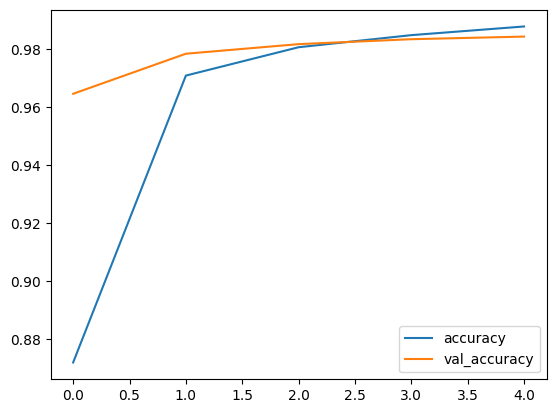

In [34]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

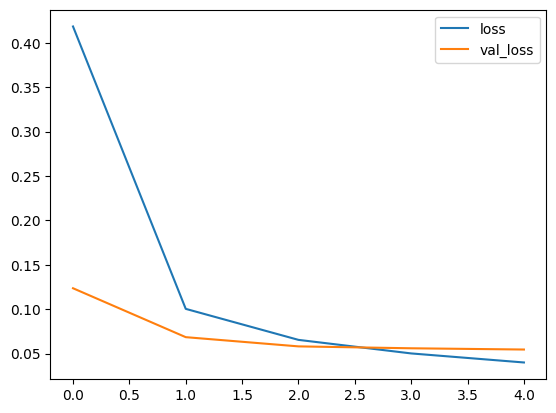

In [35]:
metrics[['loss','val_loss']].plot()

In [36]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 3s 6ms/step


In [37]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       1.00      0.98      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.98      0.99      0.98       982
           5       0.98      0.99      0.98       892
           6       0.98      0.99      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.96      0.97       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [39]:
img = image.load_img('download.png')

In [40]:
type(img)

PIL.Image.Image

In [42]:
img = image.load_img('download.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [43]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 26ms/step


In [44]:
print(x_single_prediction)

[1]


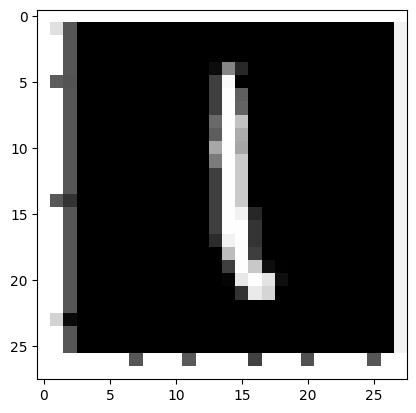

In [45]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [46]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [47]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 33ms/step


In [48]:
print(x_single_prediction)

[0]
